# Pattern Recognition Assignment 1

Create a diagnostic decision model based on Bayes theory. Given data are two indices $p(x|\omega_1),p(x|\omega_2)$ that follow Gaussian distributions, where $x$ is the vector of the indices. Classes $\omega_1,\omega_2$ have a mean of $\mu_1=(0.4, 0.8), \mu_2=(1.5, 2.7)$ respectively and a-priori probabilities $P(\omega_1) = 0.95, P(\omega_2) = 0.05$

## Part A

For the first part both distributions have a common covariance matrix $\Sigma$ : 
$$\Sigma = \begin{bmatrix} 1.5 & 0 \\ 0 & 0.8 \end{bmatrix}$$


In [7]:
# Run this cell before anything else in order to import the necessary libraries and make the necessary variable declarations
import matplotlib.pyplot as plt
import numpy as np

mu_1 = np.array([0.4, 0.8])
mu_2 = np.array([1.5, 2.7])

p_omega_1 = 0.95
p_omega_2 = 0.05

sigma = np.array([[1.5, 0], [0, .8]])
sigma_2 = np.divide(sigma,4)
step = 0.1
x_0 = np.arange(-10, 10, step)
x_1 = np.arange(-10, 10, step)
x = np.array([x_0, x_1]).transpose()
x_0, x_1 = np.meshgrid(x_0, x_1)

### Question 1

Calculate the distribution values for discrete values of $x$.

### Answer

We need to calculate $p(x|\omega_1), p(x|\omega_2)$.

From Bayesian theory for multivariate distributions, we know that:

$$p\left(\boldsymbol{x} \mid \omega_i\right)=\frac{1}{(2 \pi)^{d / 2}|\boldsymbol{\Sigma}|^{1 / 2}} \exp \left[-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^t \boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})\right]
$$


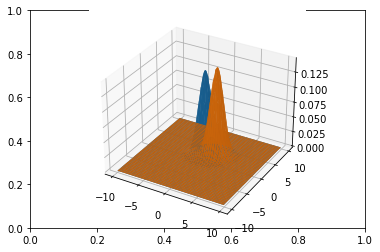

In [8]:
# Answer to question 1
def distribution_values(x_0, x_1, mu, sigma):
    d = mu.shape[0]
    p = np.zeros([x_0.shape[0], x_0.shape[1]])
    for i in range(x_0.shape[0]):
        for j in range(x_1.shape[0]):
            p[i][j] = 1 / (pow((2 * np.pi), (d / 2)) * np.sqrt(np.linalg.det(sigma))) * np.exp(
                -0.5 * np.matmul(np.matmul(np.transpose(np.subtract([x_0[i][j], x_1[i][j]], mu)), np.linalg.inv(sigma)),
                                 np.subtract([x_0[i][j], x_1[i][j]], mu)))
    return p

distribution_values_1 = distribution_values(x_0, x_1, mu_1, sigma)
distribution_values_2 = distribution_values(x_0, x_1, mu_2, sigma)
fig = plt.figure()
fig.add_subplot()
ax = plt.axes(projection='3d')
surface_mu_1 = ax.plot_surface(x_0, x_1, distribution_values_1)
surface_mu_2 = ax.plot_surface(x_0, x_1, distribution_values_2)
plt.show()


### Question 2

Calculate the probability distribution and plot it.

### Answer

The CDF of a multivariate distribution is given by the type below:
$$p(x) = \sum_{j=1}^cp(x|\omega_j)P(\omega_j)$$

where P is the a-priori distribution of $\omega$ 

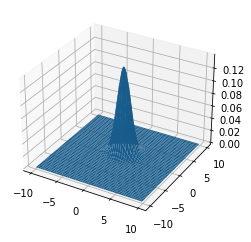

In [9]:
# Answer to question 2
def probability_distribution(x_0, x_1, mu_1, mu_2, sigma_1, sigma_2):
    d = mu_1.shape[0]

    probability_distrib = distribution_values(x_0, x_1, mu_1, sigma_1) * p_omega_1 + distribution_values(x_0, x_1, mu_2,
                                                                                                         sigma_2) * p_omega_2
    return probability_distrib


distribution = probability_distribution(x_0, x_1, mu_1, mu_2, sigma, sigma)
fig = plt.figure()
ax = plt.axes(projection='3d')
probability_of_surface = ax.plot_surface(x_0, x_1, distribution)
plt.show()


### Question 3
 
 Calculate and plot the a-posteriori probabilities $P(\omega_1|x), P(\omega_2|x)$.
 
 ### Answer
 
 As we already know from Bayesian probability theory, the a-posteriori probability is given by:
  $$P(\omega_i|x) = \frac{P(x|\omega_i)P(\omega_i)}{P(x)}$$

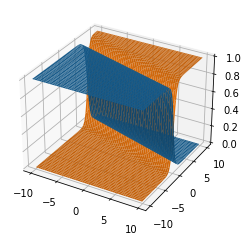

In [10]:
def a_posteriori_probability(x_0, x_1, distribution, mu, sigma, a_priori):
    a_posteriori = np.divide(distribution_values(x_0, x_1, mu, sigma) * a_priori,distribution)

    return a_posteriori

a_posteriori_1 = a_posteriori_probability(x_0, x_1,distribution, mu_1, sigma, p_omega_1)
a_posteriori_2 = a_posteriori_probability(x_0, x_1,distribution, mu_2, sigma, p_omega_2)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x_0, x_1, a_posteriori_1)
surf = ax.plot_surface(x_0, x_1, a_posteriori_2)
plt.show()

### Question 4

Calculate the Bayesian error.

### Answer

The bayesian error is the probabability that our classifier chooses the class $\omega_1$ even though $P(x|\omega_1) < P(x|\omega_2)$.
From a mathematical scope this can be written as:
$$Error = \int_{R_1} P(x|\omega_1)P(\omega_1)dx + \int_{R_2} P(x|\omega_2)P(\omega_2)dx$$
where $R_1,R_2$ are the areas that $P(x|\omega_1) < P(x|\omega_2)$ and $P(x|\omega_2) < P(x|\omega_1)$ respectively.

Since we are using a meshgrid, our values are not continuous, meaning that the integral will be changed to a sum and we will need to multiply with the mesh grid surface.
$$\sum_{R_1}P(x|\omega_1)P(\omega_1)dS + \sum_{R_2}P(x|\omega_2)P(\omega_2)dS$$
where in our case, $dS = 0.1^2$

In [12]:
def bayes_error(a_posteriori_1, a_posteriori_2, x_0, x_1,sigma_1,sigma_2):
    distribution_values_1 = distribution_values(x_0, x_1, mu_1, sigma_1)
    distribution_values_2 = distribution_values(x_0, x_1, mu_2, sigma_2)

    for i in range(a_posteriori_1.shape[0]):
        for j in range(a_posteriori_1.shape[1]):

            if a_posteriori_2[i][j] > a_posteriori_1[i][j] > 0:
                distribution_values_2[i][j] = 0
            elif a_posteriori_1[i][j] > a_posteriori_2[i][j] > 0:
                distribution_values_1[i][j] = 0

    distribution_values_2 *= pow(step,2)
    distribution_values_1 *= pow(step,2)


    error = np.sum(distribution_values_1) * p_omega_1 + np.sum(distribution_values_2) * p_omega_2

    return error

print(bayes_error(a_posteriori_1, a_posteriori_2, x_0, x_1,sigma,sigma))

0.034632414812434634


## Part 2

For this part, we have: $\Sigma_1 = \Sigma$ and $\Sigma_2 = \frac{\Sigma}{4}$

Repeat questions 1-4 and draw a conclusion about the new Bayesian error, explain the difference between Bayesian error for part one and two.

### Answers 1-4

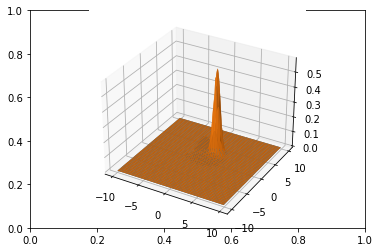

In [13]:
distribution_values_1 = distribution_values(x_0, x_1, mu_1, sigma)
distribution_values_2 = distribution_values(x_0, x_1, mu_2, sigma_2)
fig = plt.figure()
fig.add_subplot()
ax = plt.axes(projection='3d')
surface_mu_1 = ax.plot_surface(x_0, x_1, distribution_values_1)
surface_mu_2 = ax.plot_surface(x_0, x_1, distribution_values_2)
plt.show()


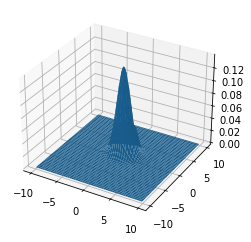

In [14]:
distribution = probability_distribution(x_0, x_1, mu_1, mu_2, sigma, sigma_2)
fig = plt.figure()
ax = plt.axes(projection='3d')
probability_of_surface = ax.plot_surface(x_0, x_1, distribution)
plt.show()


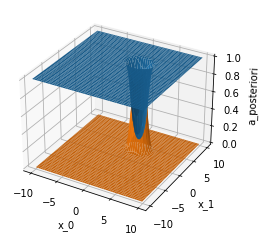

In [15]:
a_posteriori_1 = a_posteriori_probability(x_0, x_1,distribution, mu_1, sigma, p_omega_1)
a_posteriori_2 = a_posteriori_probability(x_0, x_1,distribution, mu_2, sigma_2, p_omega_2)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x_0, x_1, a_posteriori_1)
surf = ax.plot_surface(x_0, x_1, a_posteriori_2)
ax.set_xlabel('x_0')
ax.set_ylabel('x_1')
ax.set_zlabel('a_posteriori')
plt.show()


In [16]:
print(bayes_error(a_posteriori_1, a_posteriori_2, x_0, x_1,sigma,sigma_2))

0.02903427314094114


The answer to why the bayesian error decreases in **Part B** can be found by looking at the plots of the a-posteriori probabilities. Since the ***overlap region*** of the a-posteriori probabilities is smaller for $\Sigma_1 = \Sigma$ and $\Sigma_2 = \frac{\Sigma}{4}$ it is less probable that our classifier will make a wrong prediction.